In [ ]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters, measurements, morphology
from pylab import *
from scipy import misc

# Упражнение 1

Возьмите какое-нибудь изображение и примените к нему гауссово размытие. Нарисуйте изолинии для возрастающих значений sigma.

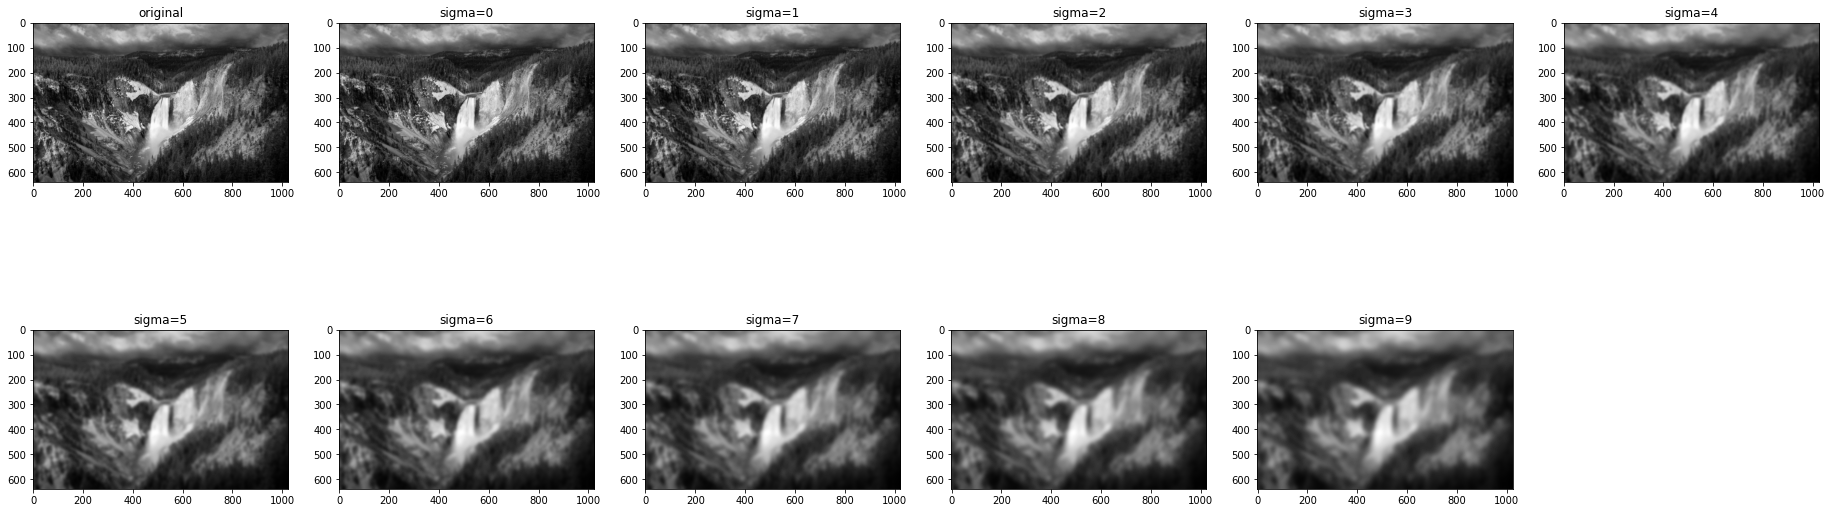

In [ ]:
im = array(Image.open('image.jpg').convert('L'))

im2 = filters.gaussian_filter(im, 2)
im5 = filters.gaussian_filter(im, 5)
im10 = filters.gaussian_filter(im, 10)

figure(figsize=(32,16))
gray()
subplot(3, 6, 1)
title('original')
imshow(im)

for i in range(10):
    subplot(3, 6, i+2)
    title('sigma='+str(i))
    im1 = filters.gaussian_filter(im, i)
    imshow(im1)

show()

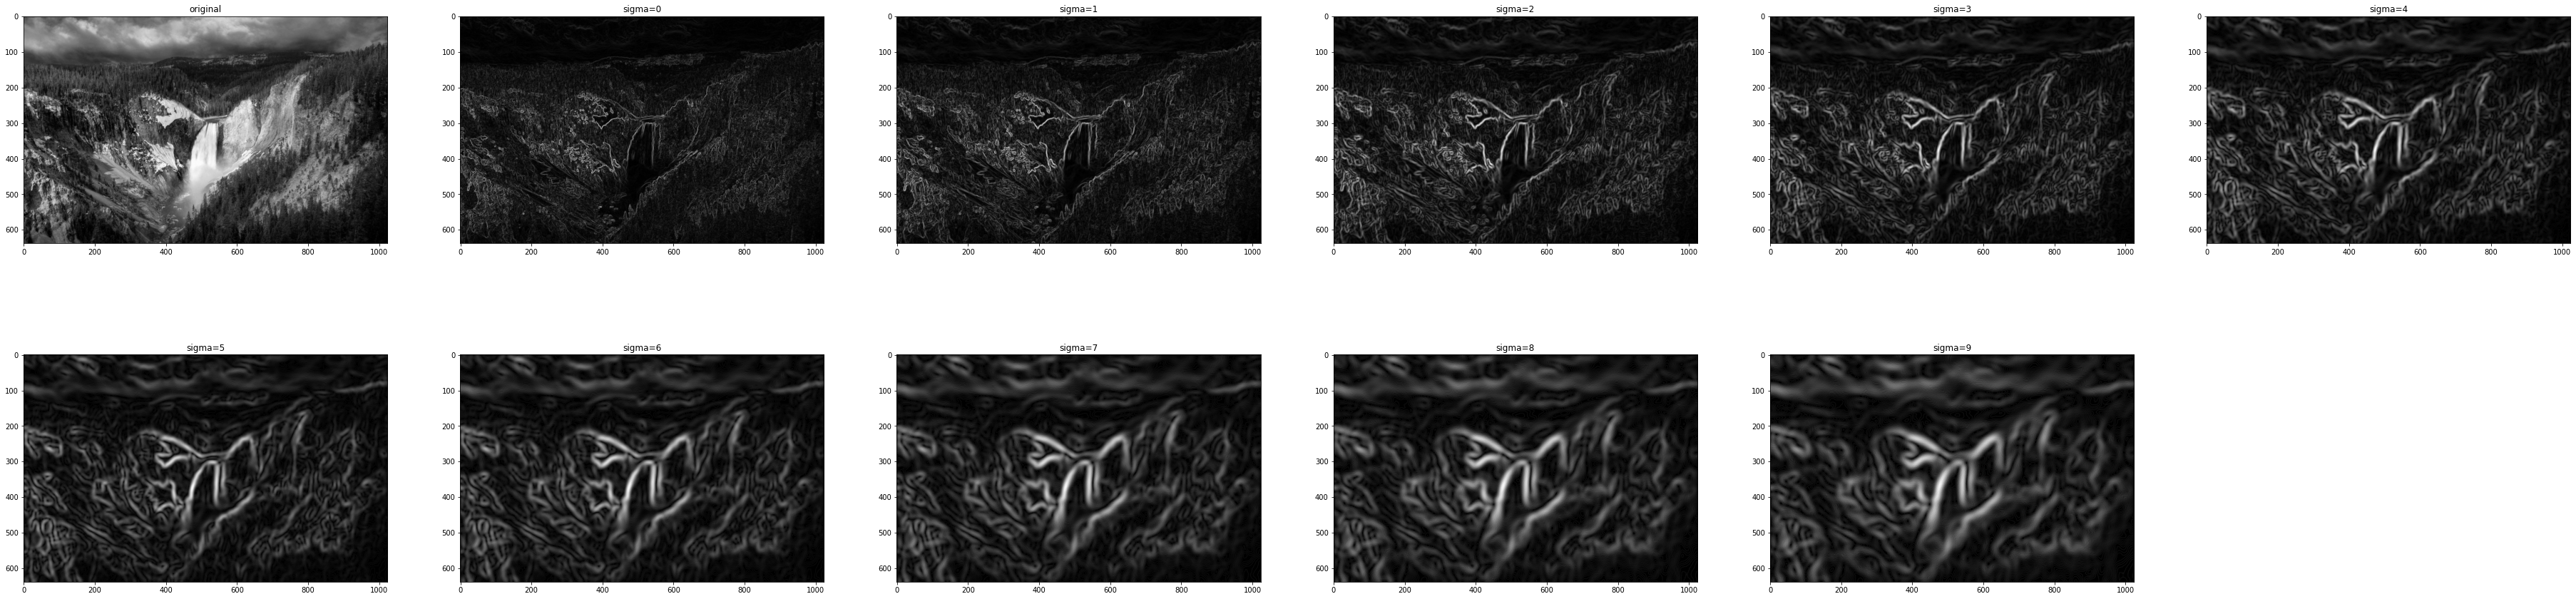

In [ ]:
figure(figsize=(64,16))
gray()
subplot(2, 6, 1)
title('original')
imshow(im)

for i in range(10):
    subplot(2, 6, i+2)
    title('sigma='+str(i))
    im1 = filters.gaussian_filter(im, i)
    imx = zeros(im1.shape)
    filters.sobel(im1, 1, imx)
    imy = zeros(im1.shape)
    filters.sobel(im1, 0, imy)
    imxy = sqrt(imx**2+imy**2)
    imshow(imxy)

show()

# Упражнение 2

Реализуйте операцию нерезкого маскирования, для чего сначала размойте изображение, а затем вычтите размытое изображение из исходного. Попробуйте применить операцию к полутоновому ии цветному изображению.

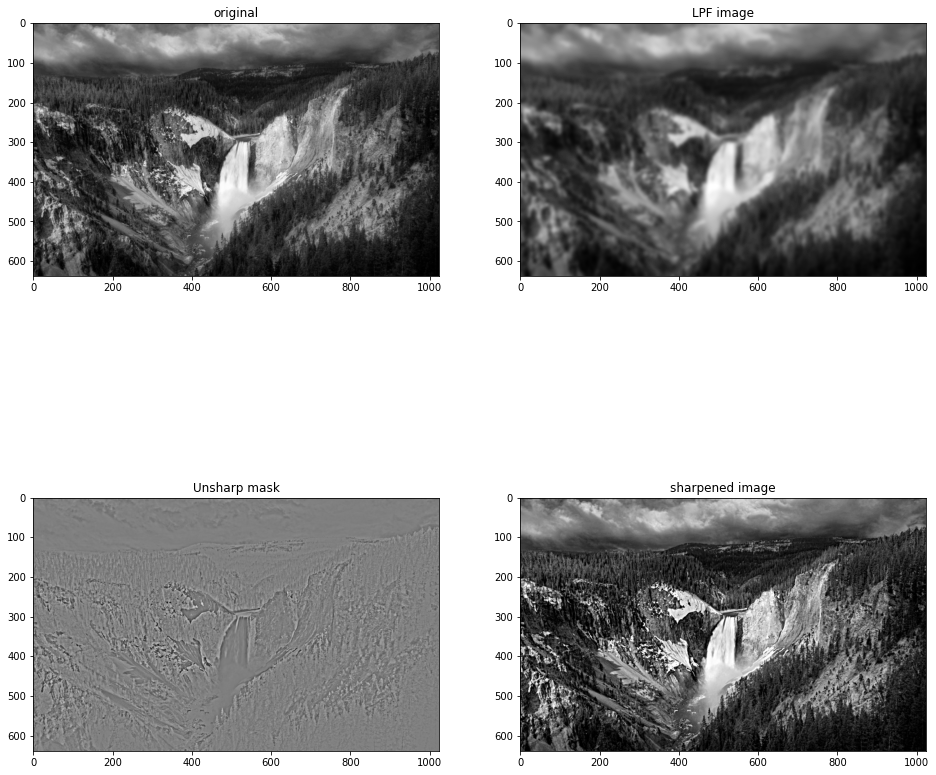

In [ ]:
im = array(Image.open('image.jpg').convert('L'))
im1 = zeros(im.shape)
im1 = filters.gaussian_filter(im, 4)
im2 = 1.0*im1-im
im3 = clip(im - 1*im2, 0, 255)

figure(figsize=(16, 16))
gray()
subplot(2, 2, 1)
title('original')
imshow(uint8(im))

subplot(2, 2, 2)
title('LPF image')
imshow(uint8(im1))

subplot(2, 2, 3)
title('Unsharp mask')
imshow(uint8(im2+128))

subplot(2, 2, 4)
title('sharpened image')
imshow(uint8(im3))

show()

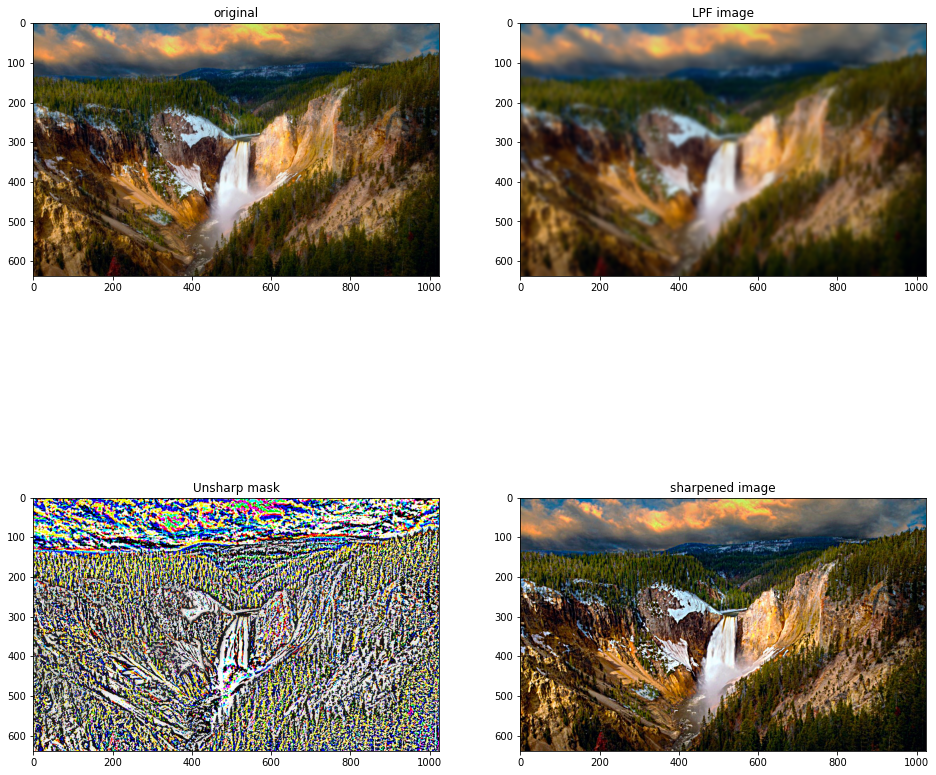

In [ ]:
im = array(Image.open('image.jpg'))
im1 = zeros(im.shape)
for i in range(3):
    im1[:, :, i] = filters.gaussian_filter(im[:, :, i], 4)
im2 = 1.0*im1-im
im3 = uint8(clip(im - 1*im2, 0, 255))

figure(figsize=(16, 16))
subplot(2, 2, 1)
title('original')
imshow(im)

subplot(2, 2, 2)
title('LPF image')
imshow(uint8(im1))

subplot(2, 2, 3)
title('Unsharp mask')
imshow(uint8(im2))

subplot(2, 2, 4)
title('sharpened image')
imshow(im3)

show()

# Упражнение 3

Альтернативой выравниваю гистограммы является метод нормировки изображения с помощью вычисления изображения-частного. Реализуйте эту операцию и протестируйте на каких-нибудь примерах.

In [ ]:
def histeq(im, nbr_bins=256):
  imhist,bins = histogram(im.flatten(), nbr_bins, normed=True)
  cdf = imhist.cumsum() # Функция распределения
  cdf = 255 * cdf / cdf[-1]
  im2 = interp(im.flatten(), bins[:-1], cdf)
  return im2.reshape(im.shape), cdf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


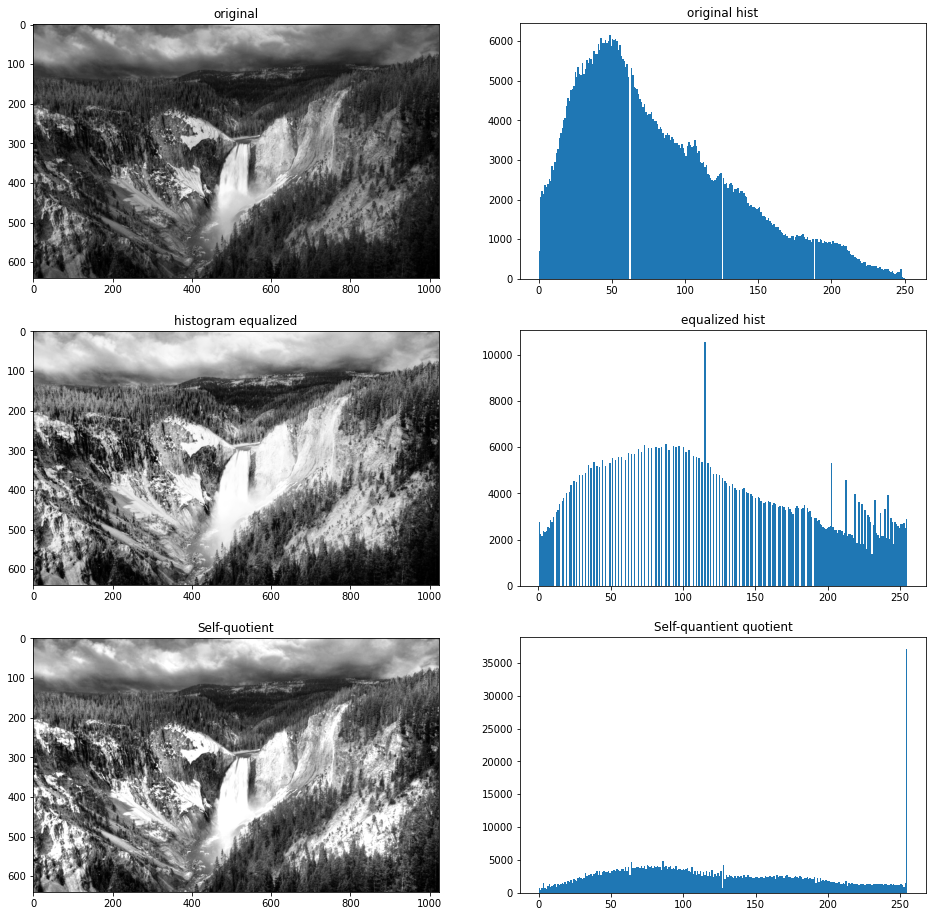

In [ ]:
im = array(Image.open('image.jpg').convert('L'))
im2, cdf = histeq(im)
im3 = 1.0*filters.gaussian_filter(im, 128)
im4 = clip(128 * (1.0 *im / (im3 + 0.1)), 0, 255)

figure(figsize=(16,16))
gray()
subplot(3, 2, 1)
title('original')
imshow(im)

subplot(3, 2, 2)
title('original hist')
hist(im.flatten(), 256)

subplot(3, 2, 3)
gray()
title('histogram equalized')
imshow(im2)

subplot(3, 2, 4)
title('equalized hist')
hist(im2.flatten(), 256)

subplot(3, 2, 5)
gray()
title('Self-quotient')
imshow(uint8(im4))

subplot(3, 2, 6)
title('Self-quantient quotient')
hist(im4.flatten(), 256)

show()

# Упражнение 4

Напишите функцию, которая находит контуры объектов внутри изображения с помощью градиентов.

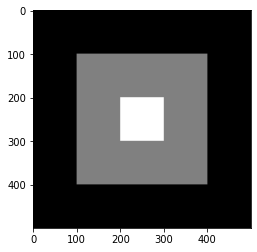

In [ ]:
im = zeros((500, 500))
im[100:400, 100:400] = 128
im[200:300, 200:300]=255
figure()
gray()
imshow(im)
show()

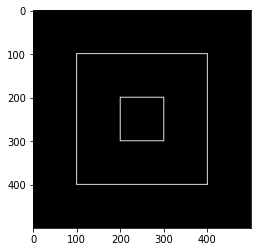

In [ ]:
def edge(X, th):
    imx = zeros(X.shape)
    filters.sobel(X, 1, imx)
    imy = zeros(X.shape)
    filters.sobel(X, 0, imy)
    ims = sqrt(imx**2 + imy**2)
    ims[ims<th]=0
    ims[ims>=th]=1
    ims = uint8(ims)
    return ims

im2 = edge(im, 0.1)
figure()
gray()
imshow(im2)
show()

# Упражнение 5

Воспользуйтесь модулем и направлением градиента для распознавания отрезков прямых внутри изображения. Оцените длину отрезков и параметры соответствующих прямых. Нанесите отрезки поверх изображения на графике.

In [ ]:
def edge_with_gauss(X, th):
    imx = zeros(X.shape)
    filters.gaussian_filter(X, (2,2), (0,1), imx)
    imy = zeros(X.shape)
    filters.gaussian_filter(X, (2,2), (1,0), imy)
    ims = sqrt(imx**2 + imy**2)
    ims[ims<th]=0
    ims[ims>=th]=1
    ims = uint8(ims)
    return ims

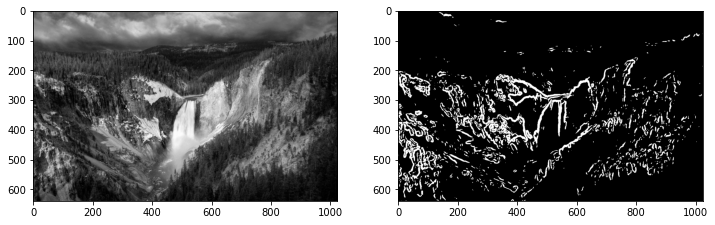

In [ ]:
im2 = array(Image.open('image.jpg').convert('L'))

im2e = edge_with_gauss(im2, 8)

figure(figsize=(12, 12))
gray()
subplot(1, 2, 1)
imshow(im2)
subplot(1, 2, 2)
imshow(im2e)
show()

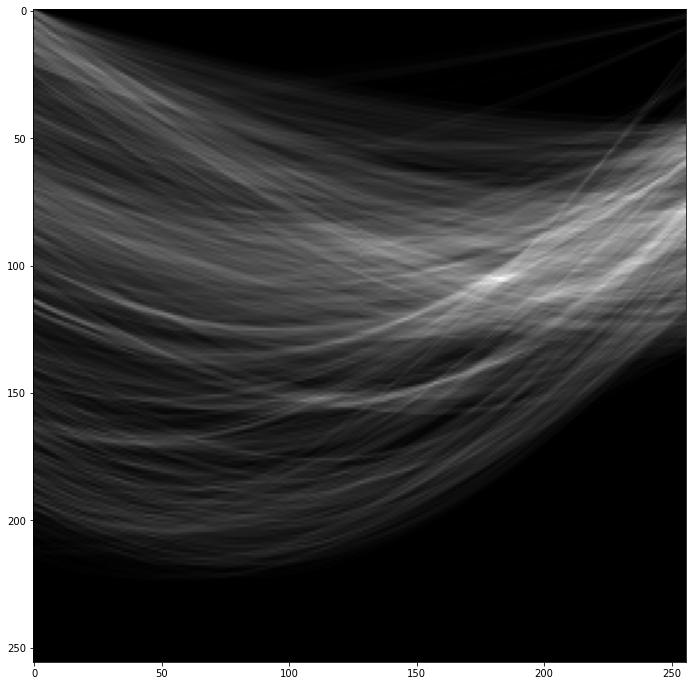

In [ ]:
# Hough transform
im3 = zeros((256, 256))
for y in range(im2e.shape[0]):
    for x in range(im2e.shape[1]):
        if (im2e[y, x]>0):
            for i in range(256):            
                t = math.pi/2*i/256
                r = x*math.cos(t)+y*sin(t)
                r = r*255/sqrt(im2e.shape[0]**2 + im2e.shape[1]**2)
                im3[int(r), i] = im3[int(r), i] + 1

figure(figsize=(12, 12))
gray()
imshow(im3)
show()

[[105.71484375, 183], [79.99609375, 255], [92.94921875, 243], [108.87109375, 223]]


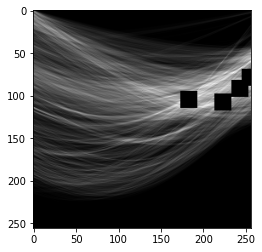

In [ ]:
peaks=[]
im4 = np.array(im3)
for i in range(4):
    ym = argmax(im4)/im4.shape[0]
    xm = argmax(im4)%im4.shape[0]
    peaks.append([ym, xm])
    im4[int(ym)-10:int(ym)+10, int(xm)-10:int(xm)+10] = -1
print(peaks)
figure()
imshow(im4)
show()

105.71484375 183.0
1.1228739367322893 64.3359375 498.4371813435159 1207.019883846161
(0, 552.9903133254534) (1024, 60.96320089382947)
79.99609375 255.0
1.564660403643354 89.6484375 377.1752960401235 1207.019883846161
(0, 377.1823963921434) (1024, 370.89913223073705)
92.94921875 243.0
1.4910293258248433 85.4296875 438.24826257506413 1207.019883846161
(0, 439.64620592768875) (1024, 357.791114753516)
108.87109375 223.0
1.368310862793992 78.3984375 513.3186520794121 1207.019883846161
(0, 524.0245973906967) (1024, 313.7984825266833)


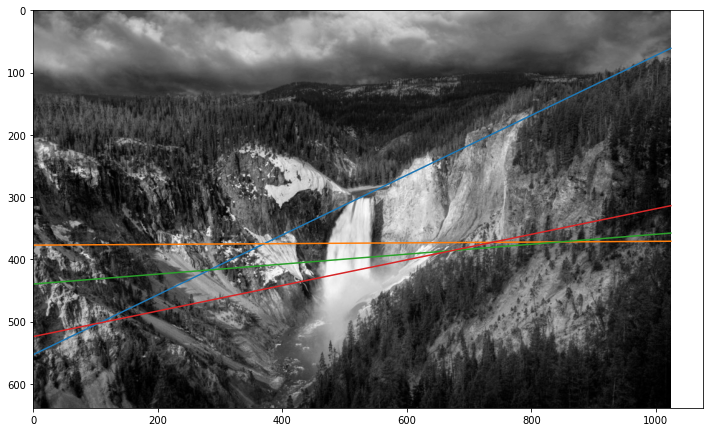

In [ ]:
figure(figsize=(12, 12))
imshow(im4)
for [rmax, tmax] in peaks:
    rmax = 1.0*rmax
    tmax = 1.0*tmax
    print(rmax, tmax)
    im4 = im2.copy()
    t = math.pi/2*tmax/256
    r = rmax/256*math.sqrt(im2.shape[0]**2 + im2.shape[1]**2)
    print( t, tmax/256*90, r, math.sqrt(im2.shape[0]**2 + im2.shape[1]**2))
    x0 = 0
    y0 = r/math.sin(t)
    if (y0<0):
        y0 = 0
        x0 = r/math.cos(t)
    elif (y0>=im4.shape[0]):
        y0 = im4.shape[0]
        x0 = (r-y0*math.sin(t))/math.cos(t)
    x1 = im4.shape[1]
    y1 = (r - math.cos(t)*x1)/math.sin(t)
    if (y1<0):
        y1 = 0
        x1 = r/math.cos(t)
    elif (y1>=im4.shape[0]):
        y1 = im4.shape[0]
        x1 = (r-y1*math.sin(t))/math.cos(t)
    plot([x0, x1], [y0, y1])
    print( (x0, y0), (x1, y1))
show()

# Упражнение 6

Примените функцию label() к бинаризированному изображению. Воспользовавшись гистограммами и результирующим меточным изображением, постройте график распределени размеров объектов внутри изображения.

Number of objects 686


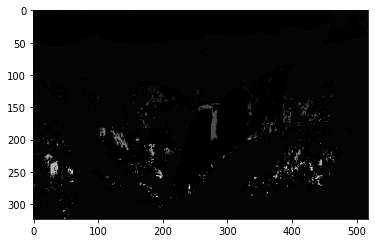

In [ ]:
im = array(Image.open('bin.png').convert('L'))
im = 1*(im<128)

labels, nbr_objects = measurements.label(im)
print( "Number of objects", nbr_objects)

figure(figsize=(6, 12))
imshow(labels)
show()

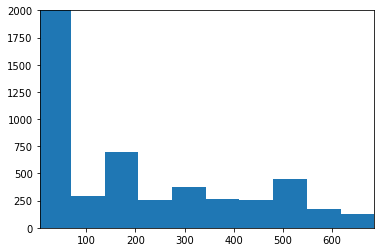

In [ ]:
figure()
hist(labels.flatten())
axis([5, 686, 0, 2000])
show()

# Упражнение 7

Поэкспериментируйте с последовательным применением морфологических операций к бинаризированному изображеню. ПОдобрав параметры, при которых получается хороший результат, попробуйте применить функцию center_of_mass из модуля morphology для нахождения координат центра каждого объекта и нанесите найденные точки на изображение.

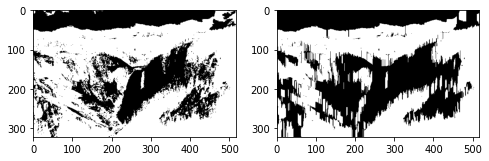

In [ ]:
im2 = array(Image.open('bin.png').convert('L'))
im2 = 1*(im2<64)
im_open = morphology.binary_opening(im2, ones((3, 1)), iterations=8)
figure(figsize=(8, 12))
subplot(1, 2, 1)
imshow(im2)
subplot(1, 2, 2)
imshow(im_open)
show()

Number of objects 61


/usr/local/lib/python3.6/dist-packages/scipy/ndimage/measurements.py:1359: RuntimeWarning: invalid value encountered in true_divide
  for dir in range(input.ndim)]


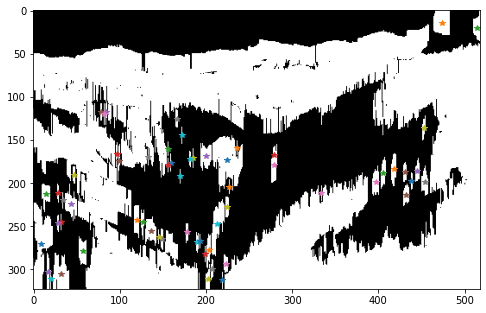

In [ ]:
labels2, nbr_objects2 = measurements.label(im_open)
print( "Number of objects", nbr_objects2)

center = measurements.center_of_mass(im_open, labels2, range(nbr_objects2))

figure(figsize=(8, 8))
imshow(im_open)
for i in range(nbr_objects2):
    plot(center[i][1], center[i][0], "*")
show()

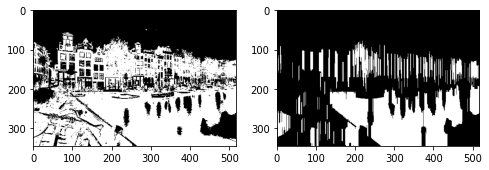

In [ ]:
im2 = array(Image.open('bin2.png').convert('L'))
im2 = 1*(im2<64)
im_open = morphology.binary_opening(im2, ones((3, 1)), iterations=15)
figure(figsize=(8, 12))
subplot(1, 2, 1)
imshow(im2)
subplot(1, 2, 2)
imshow(im_open)
show()

Number of objects 91


/usr/local/lib/python3.6/dist-packages/scipy/ndimage/measurements.py:1359: RuntimeWarning: invalid value encountered in true_divide
  for dir in range(input.ndim)]


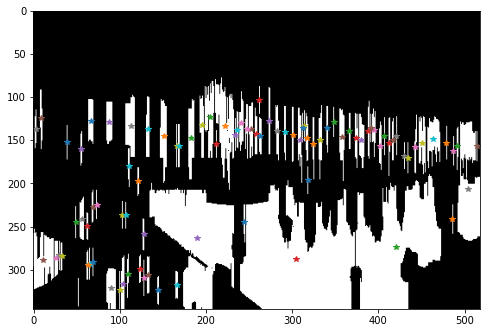

In [ ]:
labels2, nbr_objects2 = measurements.label(im_open)
print( "Number of objects", nbr_objects2)

center = measurements.center_of_mass(im_open, labels2, range(nbr_objects2))

figure(figsize=(8, 8))
imshow(im_open)
for i in range(nbr_objects2):
    plot(center[i][1], center[i][0], "*")
show()